## Models for Predicting Fetal Health

### Import Libraries

In [40]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# F1 score
from sklearn.metrics import f1_score

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

### Load data

In [41]:
# Import Data
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [42]:
# Select input and output features
X = df.drop(columns = ['fetal_health'])
y = df['fetal_health']

In [43]:
# One hot encoding for categorical variables
X_encoded = pd.get_dummies(X)
X_encoded.head()



,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [44]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

### Implement Random Forest Regressor

In [45]:
# Defining prediction model
clf_dt = DecisionTreeClassifier(random_state = 0)
clf_rf = RandomForestClassifier(random_state = 0)
clf_ada = AdaBoostClassifier(random_state = 0)


# Fitting models on training data
clf_dt.fit(train_X, train_y)
clf_rf.fit(train_X, train_y)
clf_ada.fit(train_X, train_y)


AdaBoostClassifier(random_state=0)

### Evaluate Prediction Performance on Test Set

In [46]:
# Predict Test Set
y_pred_dt = clf_dt.predict(test_X)
y_pred_rf = clf_rf.predict(test_X)
y_pred_ada = clf_ada.predict(test_X)

# Get normalized macro F1 scores
dt_f1 = f1_score(y_true=test_y, y_pred=y_pred_dt, average="macro")
rf_f1 = f1_score(y_true=test_y, y_pred=y_pred_rf, average="macro")
ada_f1 = f1_score(y_true=test_y, y_pred=y_pred_ada, average="macro")

norm_dt_f1 = dt_f1/(dt_f1+rf_f1+ada_f1)
norm_rf_f1 = rf_f1/(dt_f1+rf_f1+ada_f1)
norm_ada_f1 = ada_f1/(dt_f1+rf_f1+ada_f1)
print(norm_dt_f1)
print(norm_rf_f1)
print(norm_ada_f1)

0.3380112112898303
0.33850015575099407
0.3234886329591756


In [47]:
voting_weights = [norm_dt_f1, norm_rf_f1, norm_ada_f1]
clf_vote = VotingClassifier(estimators=[('dt', clf_dt), ('rf', clf_rf), ('ada', clf_ada)], voting='soft', weights = voting_weights)
clf_vote.fit(train_X, train_y)

y_pred_vote = clf_vote.predict(test_X)


In [53]:
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf_dt,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = ["Normal", "Suspect", "Pathological"],
                   filled = True)

# Saving Decision Tree
fig.savefig("dt_visual.svg", bbox_inches = 'tight')

### Feature Importance Plots

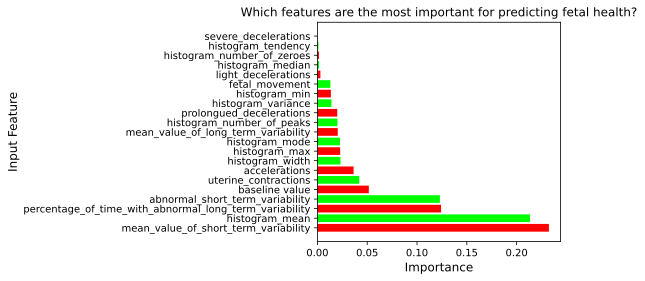

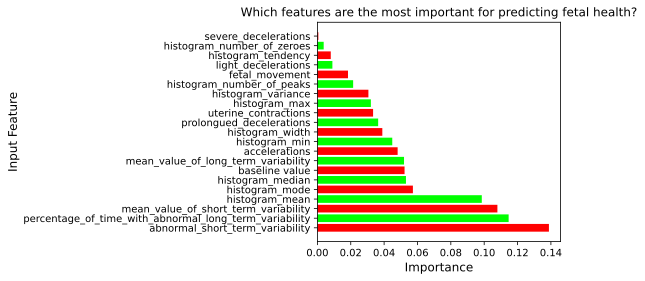

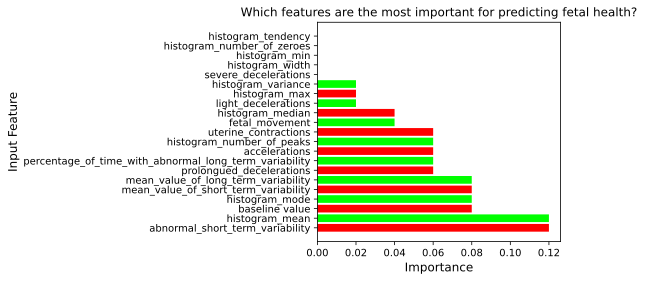

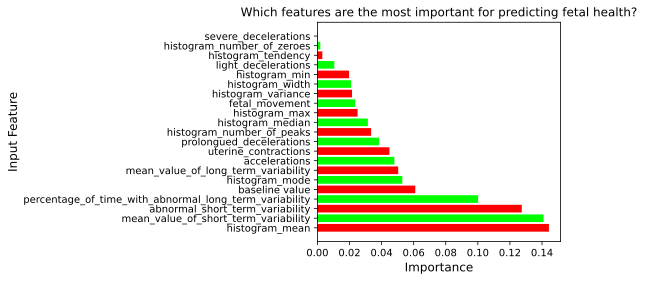

In [ ]:
# Plot importances
def importance_plot(importance, save_as):

    # Storing feature importance as a dataframe
    feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
                columns = ['Feature', 'Importance'])

    feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

    # Bar plot
    plt.figure(figsize=(8, 4))
    plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'lime'])

    plt.xlabel("Importance", fontsize = 12)
    plt.ylabel("Input Feature", fontsize = 12)
    plt.title('Which features are the most important for predicting fetal health?', fontsize = 12) 
    plt.yticks(fontsize = 10) # fontsize of yticks
    plt.xticks(fontsize = 10) # fontsize of xticks

    plt.tight_layout();
    plt.savefig("figures/" + save_as, bbox_inches = 'tight')

# Plotting importance values from the trained models
importance_plot(clf_dt.feature_importances_, "feature_imp_dt.svg")    
importance_plot(clf_rf.feature_importances_, "feature_imp_rf.svg")
importance_plot(clf_ada.feature_importances_, "feature_imp_ada.svg")

# Plotting importance values from the trained voting model
vote_importance = norm_dt_f1*clf_dt.feature_importances_ + norm_rf_f1*clf_rf.feature_importances_ + norm_ada_f1*clf_ada.feature_importances_
importance_plot(vote_importance, "feature_imp_vote.svg")    



### Confusion Matrices

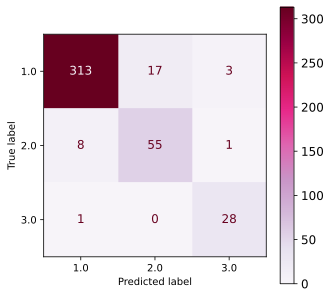

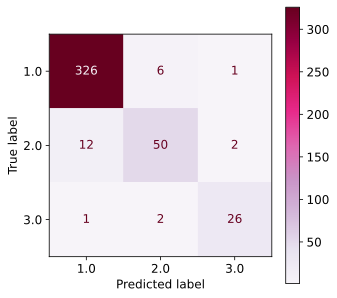

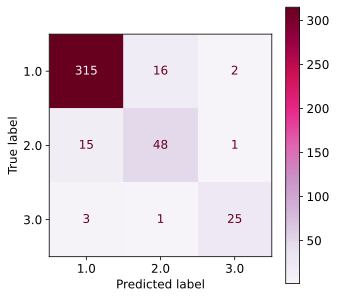

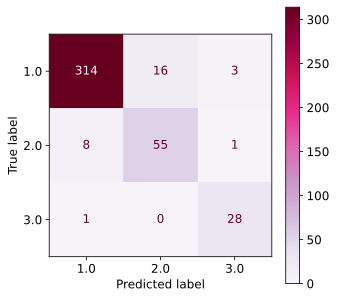

In [ ]:
# Get image of confusion matrix
def confusion_matrix_image(model, save_as):
    # Predictions on test set
    y_pred = model.predict(test_X)

    # Now generate confusion matrix
    cm = confusion_matrix(test_y, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)

    # Specify figure size
    fig, ax = plt.subplots(figsize = (5, 5))
    plt.rcParams.update({'font.size': 12})

    # Display Confusion Matrix
    disp.plot(cmap = 'PuRd', ax = ax);

    #Save confusion matrix
    fig.savefig("figures/" + save_as, bbox_inches = 'tight')


confusion_matrix_image(clf_dt, "confusion_mat_dt.svg")
confusion_matrix_image(clf_rf, "confusion_mat_rf.svg")
confusion_matrix_image(clf_ada, "confusion_mat_ada.svg")
confusion_matrix_image(clf_vote, "confusion_mat_vote.svg")


### Classification Reports

In [ ]:
# Generating Classification Reports

y_pred_dt = clf_dt.predict(test_X)
y_pred_rf = clf_rf.predict(test_X)
y_pred_ada = clf_ada.predict(test_X)

report_dt = pd.DataFrame(classification_report(test_y, y_pred_dt, output_dict = True))
report_rf = pd.DataFrame(classification_report(test_y, y_pred_rf, output_dict = True))
report_ada = pd.DataFrame(classification_report(test_y, y_pred_ada, output_dict = True))
report_vote = pd.DataFrame(classification_report(test_y, y_pred_vote, output_dict = True))

# Save the reports as CSV Files
report_dt.to_csv('figures/class_report_dt.csv') 
report_rf.to_csv('figures/class_report_rf.csv') 
report_ada.to_csv('figures/class_report_ada.csv') 
report_vote.to_csv('figures/class_report_vote.csv') 


In [ ]:
# Pickle file: saving the trained models

# Creating the files where we want to write the models
dt_pickle = open('dt_fetalhealth_model.pickle', 'wb') 
rf_pickle = open('rf_fetalhealth_model.pickle', 'wb') 
ada_pickle = open('ada_fetalhealth_model.pickle', 'wb') 
vote_pickle = open('vote_fetalhealth_model.pickle', 'wb') 


# Write models to the files
pickle.dump(clf_dt, dt_pickle) 
pickle.dump(clf_rf, rf_pickle) 
pickle.dump(clf_ada, ada_pickle) 
pickle.dump(clf_vote, vote_pickle) 

# Close the files
dt_pickle.close() 
rf_pickle.close() 
ada_pickle.close() 
vote_pickle.close() 